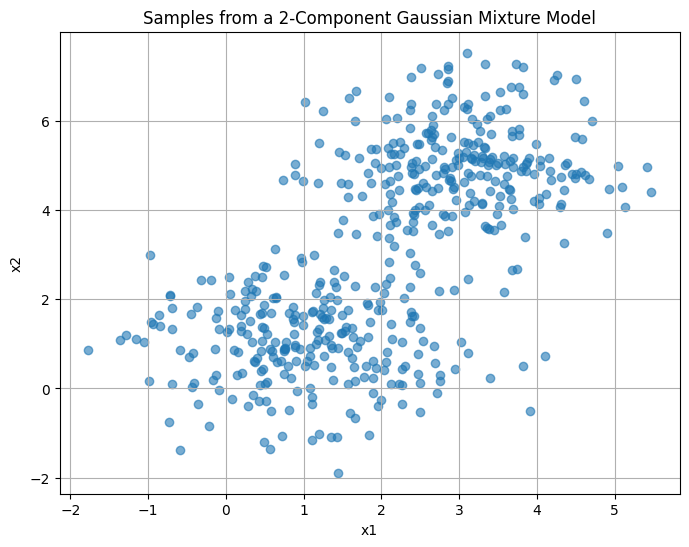

In [ ]:
import matplotlib.pyplot as plt
import pyro
import pyro.distributions as dist
import torch


def model(n_samples):
    # Define the means of the two components
    mu1 = torch.tensor([1.0, 1.0])
    mu2 = torch.tensor([3.0, 5.0])
    # Stack the means into a tensor of shape (2, 2)
    locs = torch.stack([mu1, mu2])

    # Define the covariance matrices (identity matrices for both components)
    cov = torch.eye(2)
    # Stack the covariance matrices into a tensor of shape (2, 2, 2)
    covs = cov.repeat(2, 1, 1)

    # Define the mixture weights (in the ratio 1:2)
    weights = torch.tensor([1 / 2, 1 / 2])
    # weights = weights / weights.sum()  # Normalize to sum to 1

    # Create a categorical distribution to sample component indices
    mix = dist.Categorical(weights)
    # Create the component distributions
    comp = dist.MultivariateNormal(locs, covariance_matrix=covs)
    # Create the mixture distribution
    gmm = dist.MixtureSameFamily(mix, comp)

    # Sample from the mixture distribution using Pyro's plate for independence
    with pyro.plate("data_plate", n_samples):
        samples = pyro.sample("obs", gmm)
    return samples


# Number of samples to draw
n_samples = 500

# Generate samples from the model
samples = model(n_samples)

# Convert samples to numpy array for plotting
samples = samples.detach().numpy()

# Plot the sampled data points
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6)
plt.title("Samples from a 2-Component Gaussian Mixture Model")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()